This Notebook will show the relationship between the expression of the genes inside of each model particle, and the distance of these particles to the COM of the clusters defined in 08_Co-occurrenceMatrix.ipynb

# Libraries and functions

In [1]:
import sys
import cPickle as pickle

## Parameters to modify 

In [2]:
# Maximum number of models to be used. From ~1500 done, we will keep the best 1000
modelsKeep = 1000
# Base path where the folder branch is stored
basePath = '/home/julen/TADdyn/TADdyn_tutorial/'
# Define the orther of the cells for the ploting
orderCell = ['Ery', 'nCD4', 'Mon']
# Define the coloring options for each cell
colors = [(120/255., 94/255., 240/255.), 
          (254/255., 97/255., 0/255.),
          (220/255., 38/255., 127/255.)
         ]
# Wether to store figures in pdf or not
saveFig = True
# In which of the model clusters we will do the analysis
cluster = 1

# Optinal file with information about expression chip or other measures whose 
# location will be shown in the plots
# Format: Name Chromosome Coordinate Cell1 Cell2, Cell3, ...
# Example: Gene Chr TSS Ery nCD4 Mon  # Each Cell column has the expression value
# Of that cell in the gene that names the row
signalData = basePath + 'additionaInput/expressionData.txt'
# The signal thresshold associated to this files (if none leave it as None which
# will define 0 by default)
# Allowed lowest value is 0
thresshold = 0

# Run 

## Import additional libraries 

In [3]:
sys.path.append(basePath + 'code')
import fileHandling
import plotting
import metrics

## Define new paths 

In [4]:
# Output path for pickles and plots
outdata = basePath + 'outData/modelAnalysis/model_comparisons/coOccurrenceMatrix/'
outplot = basePath + 'outPlot/modelAnalysis/model_comparisons/coOccurrenceMatrix/'

## Get model files and regions 

In [5]:
## Path were the models are stored
cells, regionsAll, models = fileHandling.getModelsPaths(basePath, ending='models')

## get regions
regiones = {}
# get info of the regions
for cell in cells:
    for regi in regionsAll:
        if not regi in regiones:
            
            regiones[regi] = fileHandling.getREgiInfo(basePath, regi, cell)
        else:
            infot = fileHandling.getREgiInfo(basePath, regi, cell)
            if infot != regiones[regi]:
                print('Region %s, cell %s has different parameters than previous cells')
                print('This code is not prepared to compare models with different length \
                      or resolution')

## Retrieve clustering data 

In [6]:
# If we ran this script with less models, will recover the previous clustering info
clustersPickle= basePath + 'outData/modelAnalysis/clustering/allClusterDict.pickle' 
with open(clustersPickle, "rb") as input_file:
    allClusters = pickle.load(input_file)
print('Recovering previous clustering data from:')
print(clustersPickle)

Recovering previous clustering data from:
/home/julen/TADdyn/TADdyn_tutorial/outData/modelAnalysis/clustering/allClusterDict.pickle


## Load expression data and gene positions 

In [7]:
newSignalPos, newSignal = fileHandling.getSignalAndPos(regiones, orderCell, 
                                                       signalData, signalThresshold=thresshold)

## Load clustering data

In [8]:
with open(outdata + 'coOccurrenceClusters', 'rb') as handle:
    clustersBinPos, clusterGeneNames = pickle.load(handle)

In [9]:
with open(outdata + 'clustersDistance.pickle', 'rb') as handle:
    meandistancesCluster, centersOfMass = pickle.load(handle)

In [10]:
rankedSum = metrics.rankExpression(clustersBinPos, newSignalPos, newSignal)

## Get expression in relation to distance to COM of the cluster 

In [11]:
expeCOMdist = metrics.getExpressionAndCOMd(centersOfMass, models, modelsKeep, clustersBinPos,
                                           newSignalPos, newSignal, allClusters, cluster)

## Plot 

### Ery ###


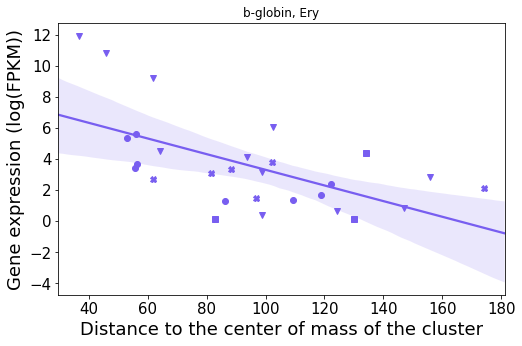

### nCD4 ###


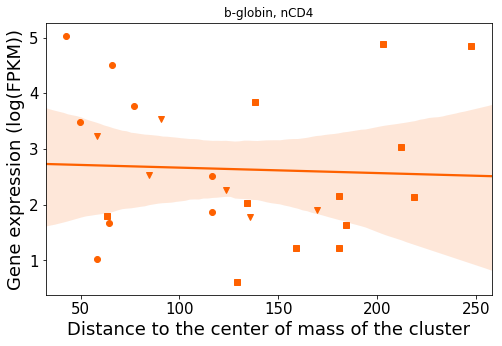

### Mon ###


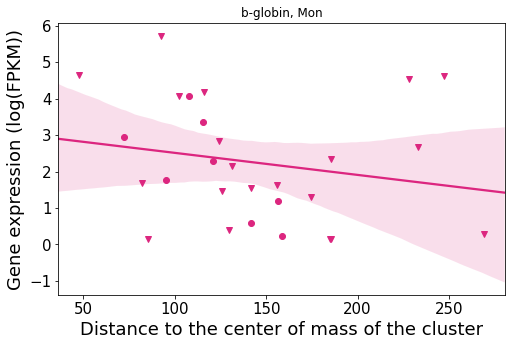

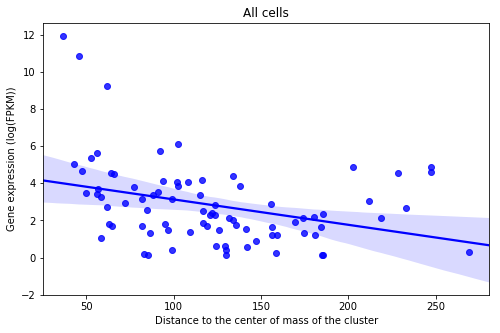

In [12]:
statistics = plotting.plotExpressionAndCOMd(outplot, expeCOMdist, orderCell, colors,
                          saveFig=saveFig)

In [13]:
for regi in statistics:
    print ('#' * 3 + ' %s ' %regi + '#' * 3)
    for cell in statistics[regi]:
        print ('-' * 3 + ' %s ' %regi + '-' * 3)
        print statistics[regi][cell]['lineregress']
        print statistics[regi][cell]['spearmanr']

### b-globin ###
--- b-globin ---
LinregressResult(slope=-0.006047564069499754, intercept=3.1180085280655323, rvalue=-0.20180769166492118, pvalue=0.3030926699159532, stderr=0.005756086982223275)
SpearmanrResult(correlation=-0.3037766830870279, pvalue=0.11605529821938766)
--- b-globin ---
LinregressResult(slope=-0.013662028323035688, intercept=4.495243297949926, rvalue=-0.3400430420104147, pvalue=0.0017741170524933016, stderr=0.004224287569043229)
SpearmanrResult(correlation=-0.37160022202631665, pvalue=0.0005875849764095406)
--- b-globin ---
LinregressResult(slope=-0.05045179578366916, intercept=8.360839786239845, rvalue=-0.5932920817359316, pvalue=0.0008757909640584468, stderr=0.013424880106596163)
SpearmanrResult(correlation=-0.5555555555555555, pvalue=0.0021469538258602067)
--- b-globin ---
LinregressResult(slope=-0.0009723473302323984, intercept=2.7624953985607767, rvalue=-0.04550770443163978, pvalue=0.825289834218516, stderr=0.004356931268379068)
SpearmanrResult(correlation=-0.090